In [99]:
import os
os.getcwd()

'C:\\Users\\hp\\4.STATS_&_ML_by_Sundaram_sir\\Muffassil\\Logistic_regression\\model_1'

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [101]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [102]:
df.shape

(891, 15)

In [103]:
# preprocessing steps 
# checking missing value
df.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [104]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [105]:
print("age", 714/891)

age 0.8013468013468014


<AxesSubplot:ylabel='age'>

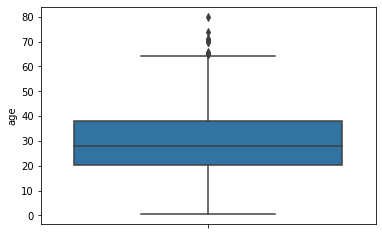

In [106]:
sns.boxplot(y ='age', data=df)

In [107]:
df['age'] = df['age'].fillna(df['age'].median())

In [108]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [109]:
print('deck',688/891)

deck 0.7721661054994389


In [110]:
# pls drop 'deck' column

In [111]:
df = df.drop(['deck'],axis=1)

In [112]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [113]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [114]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [115]:
df['embarked'] = df['embarked'].fillna('S')

In [116]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [117]:
df['embark_town'].value_counts()
# since 'embark_town' is the full form of 'embarked' value
# so we have to drop this variable 

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [118]:
df['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [119]:
df = df.drop(['embark_town'], axis=1)

In [120]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [121]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True
5,0,3,male,28.0,0,0,8.4583,Q,Third,man,True,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,yes,False


In [122]:
# drop alive as it's duplicate variable

In [123]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [124]:
df.describe(include='O')

,sex,embarked,who,alive
count,891,891,891,891
unique,2,3,3,2
top,male,S,man,no
freq,577,646,537,549


In [125]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alive', 'alone'],
      dtype='object')

In [126]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [127]:
df['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [128]:
df = df.drop(['pclass'], axis=1)

In [129]:
df.head()

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,male,35.0,0,0,8.0500,S,Third,man,True,no,True


In [130]:
df = df.drop(['alive','alone'], axis=1)

In [131]:
df.head(20)

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male
0,0,male,22.0,1,0,7.2500,S,Third,man,True
1,1,female,38.0,1,0,71.2833,C,First,woman,False
2,1,female,26.0,0,0,7.9250,S,Third,woman,False
3,1,female,35.0,1,0,53.1000,S,First,woman,False
4,0,male,35.0,0,0,8.0500,S,Third,man,True
5,0,male,28.0,0,0,8.4583,Q,Third,man,True
6,0,male,54.0,0,0,51.8625,S,First,man,True
7,0,male,2.0,3,1,21.0750,S,Third,child,False
8,1,female,27.0,0,2,11.1333,S,Third,woman,False
9,1,female,14.0,1,0,30.0708,C,Second,child,False


In [132]:
df = df.drop(['who', 'adult_male','fare'], axis = 1)

In [136]:
df.head()

,survived,sex,age,sibsp,parch,embarked,class
0,0,male,22.0,1,0,S,Third
1,1,female,38.0,1,0,C,First
2,1,female,26.0,0,0,S,Third
3,1,female,35.0,1,0,S,First
4,0,male,35.0,0,0,S,Third


In [134]:
df.isnull().sum()

survived    0
sex         0
age         0
sibsp       0
parch       0
embarked    0
class       0
dtype: int64

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   sex       891 non-null    object  
 2   age       891 non-null    float64 
 3   sibsp     891 non-null    int64   
 4   parch     891 non-null    int64   
 5   embarked  891 non-null    object  
 6   class     891 non-null    category
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 42.9+ KB


In [137]:
df=pd.get_dummies(columns=['sex'], data=df, drop_first=True)
df.head()

,survived,age,sibsp,parch,embarked,class,sex_male
0,0,22.0,1,0,S,Third,1
1,1,38.0,1,0,C,First,0
2,1,26.0,0,0,S,Third,0
3,1,35.0,1,0,S,First,0
4,0,35.0,0,0,S,Third,1


In [138]:
df=pd.get_dummies(columns=['embarked'], data=df, drop_first=True)
df.head()

,survived,age,sibsp,parch,class,sex_male,embarked_Q,embarked_S
0,0,22.0,1,0,Third,1,0,1
1,1,38.0,1,0,First,0,0,0
2,1,26.0,0,0,Third,0,0,1
3,1,35.0,1,0,First,0,0,1
4,0,35.0,0,0,Third,1,0,1


In [139]:
df=pd.get_dummies(columns=['class'], data=df, drop_first=True)
df.head()


,survived,age,sibsp,parch,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1


In [140]:
# sigmoid
# outlier is non-significant activities in logistic regression
df['age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [141]:
# feature scaling is not required as most of the data are in binary format and also age is given less than 100
# imbalance dataset check
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:>

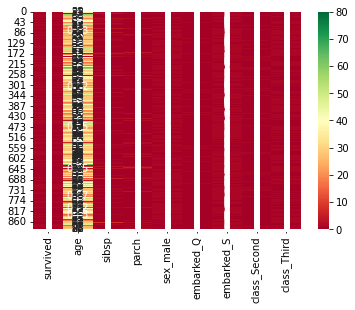

In [142]:
sns.heatmap(df, annot=True, cmap='RdYlGn')

<AxesSubplot:>

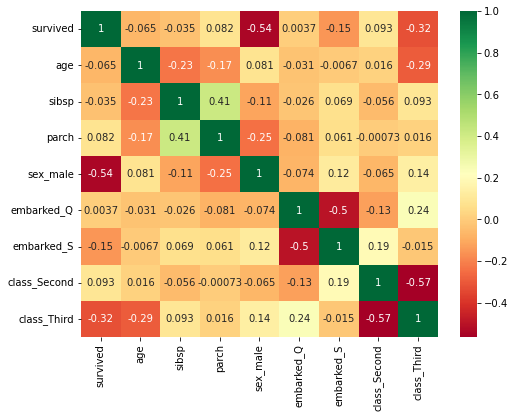

In [146]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

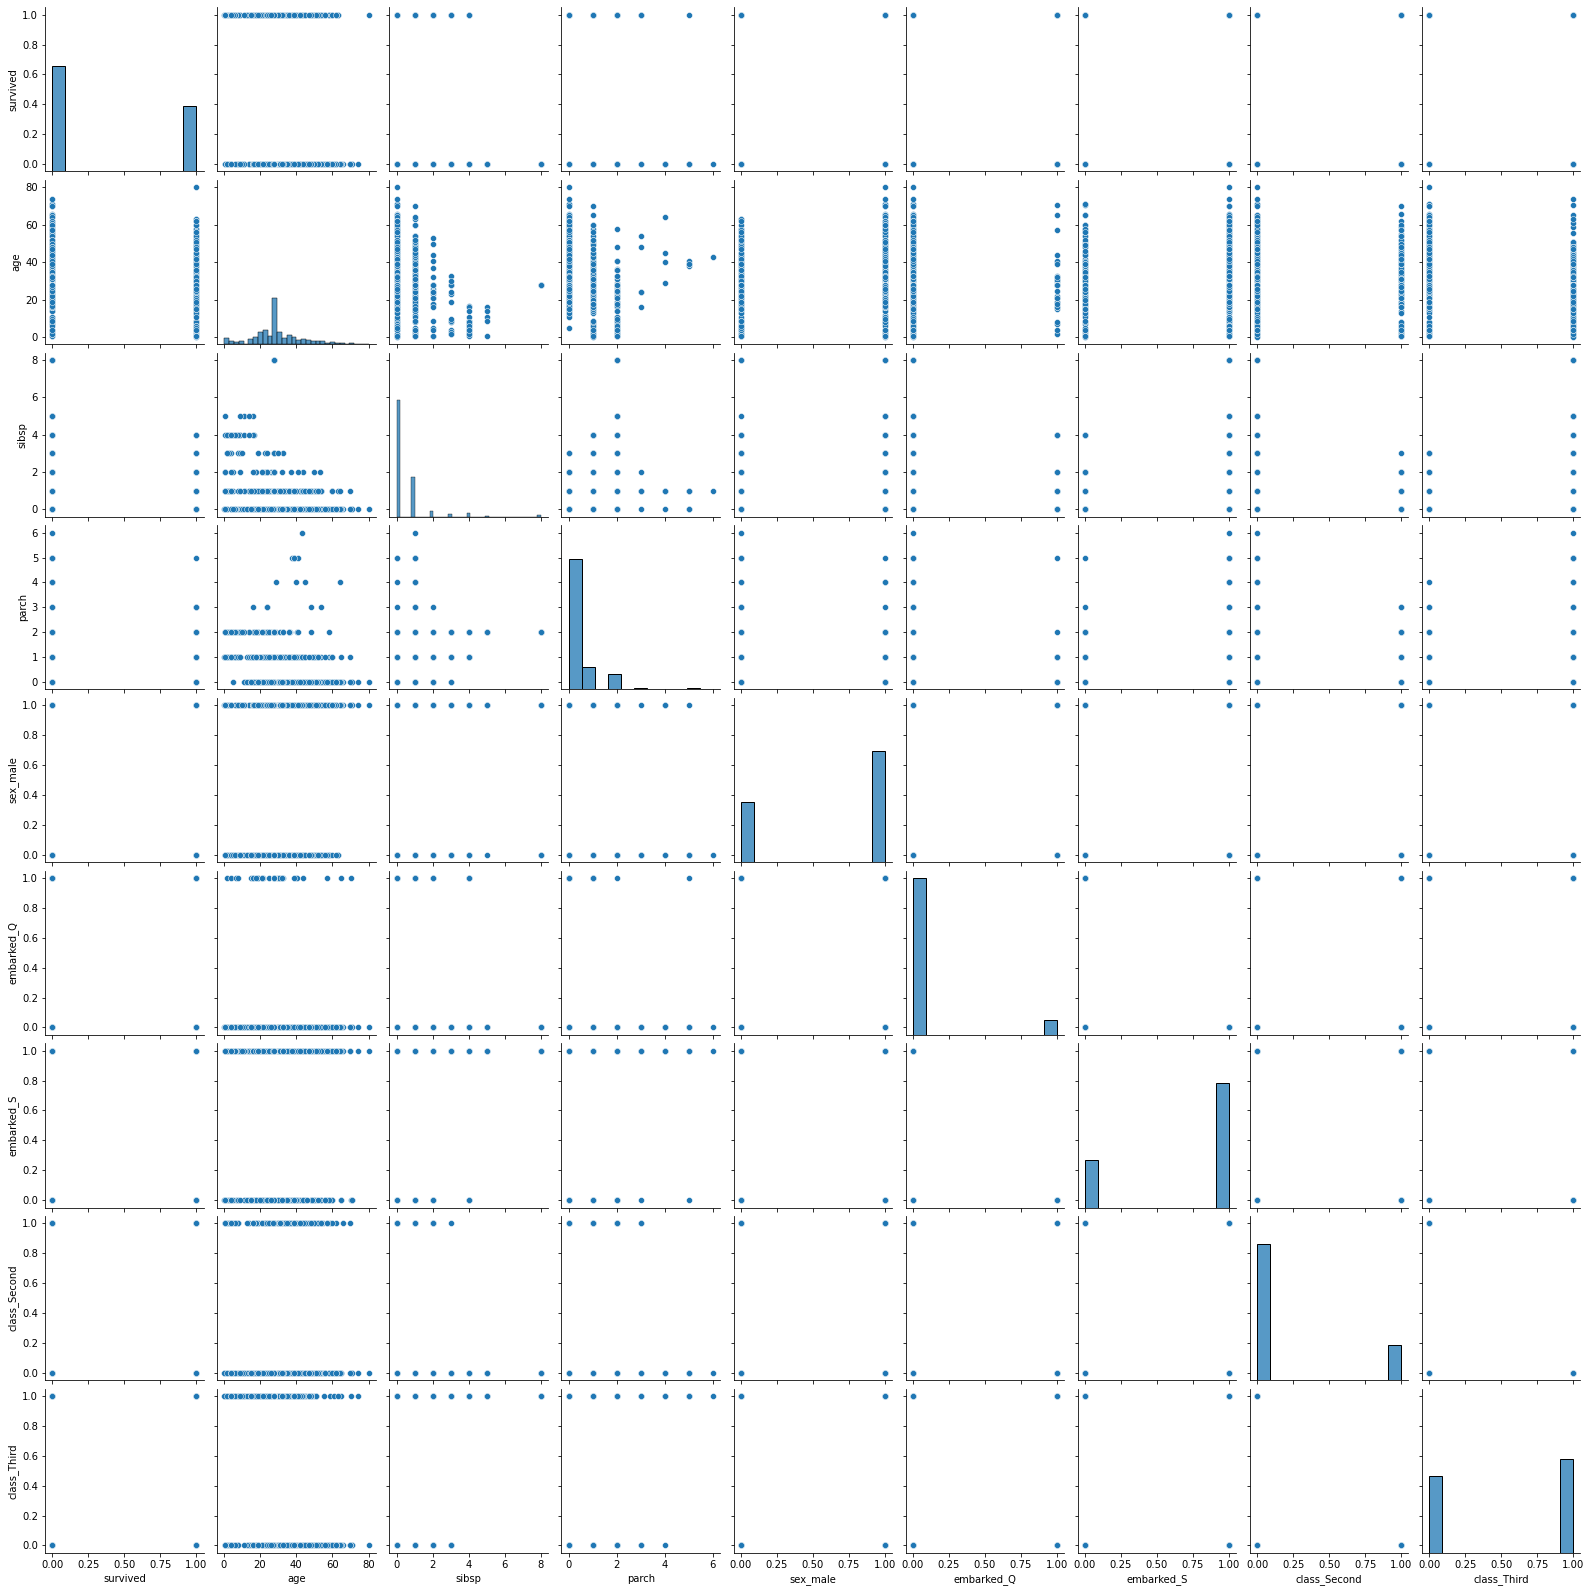

In [147]:
sns.pairplot(df)

In [148]:
df.head()

,survived,age,sibsp,parch,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1


In [149]:
# split the data into dependent variable and independent variable
x = df.iloc[:,1:].values
y = df['survived'].values

In [150]:
x1 = df.iloc[:,1:]
y1 = df['survived']

In [151]:
x1

,age,sibsp,parch,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,22.0,1,0,1,0,1,0,1
1,38.0,1,0,0,0,0,0,0
2,26.0,0,0,0,0,1,0,1
3,35.0,1,0,0,0,1,0,0
4,35.0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...
886,27.0,0,0,1,0,1,1,0
887,19.0,0,0,0,0,1,0,0
888,28.0,1,2,0,0,1,0,1
889,26.0,0,0,1,0,0,0,0


In [152]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [153]:
# split the data into training and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y1,train_size=0.75, random_state=1)
print(x_train.shape)
print("###"*20)
print(x_test.shape)
print("###"*20)
print(y_train.shape)
print("###"*20)
print(y_test.shape)
print("###"*20)

(668, 8)
############################################################
(223, 8)
############################################################
(668,)
############################################################
(223,)
############################################################


# Building Logistic Regression Model

In [154]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)

LogisticRegression()

In [155]:
y_pred_test = logit_model.predict(x_test)

In [156]:
y_pred_test

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [157]:
y_test

862    1
223    0
84     1
680    0
535    1
      ..
506    1
467    0
740    1
354    0
449    1
Name: survived, Length: 223, dtype: int64

In [158]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [159]:
print(confusion_matrix(y_test, y_pred_test))

[[114  14]
 [ 29  66]]


In [160]:
(114+66)/(114+14+29+66)

0.8071748878923767

In [161]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       128
           1       0.82      0.69      0.75        95

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.81      0.80       223



In [162]:
print(accuracy_score(y_test, y_pred_test))

0.8071748878923767


In [163]:
# test result = 80.71%
# training result = ?

In [164]:
y_pred_train = logit_model.predict(x_train)

In [165]:
y_pred_train

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [166]:
y_train

35     0
46     0
453    1
291    1
748    0
      ..
715    0
767    0
72     0
235    0
37     0
Name: survived, Length: 668, dtype: int64

In [167]:
accuracy_score(y_train, y_pred_train)

0.8098802395209581

In [168]:
# test result = 80.71%
# training result = 80.98%

In [169]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc =  roc_auc_score(y_test, y_pred_test)
logistic_roc_auc

0.7926809210526315

In [170]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
display(fpr[:10])
display(tpr[:10])
display(thresholds[:10])

array([0.      , 0.109375, 1.      ])

array([0.        , 0.69473684, 1.        ])

array([2, 1, 0], dtype=int64)

# Plotting ROC and AUC 

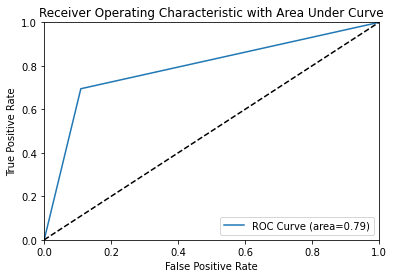

In [171]:
plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" % logistic_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

# K-Fold method (cross validation approach)

In [172]:
from sklearn.model_selection import cross_val_score
accuracy_training = cross_val_score(logit_model, x_train, y_train, cv=15)
accuracy_test = cross_val_score(logit_model, x_test, y_test, cv=15)
print(accuracy_training)
print("######"*50)
print(accuracy_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.66666667 0.77777778 0.75555556 0.84444444 0.8        0.77777778
 0.93333333 0.82222222 0.90909091 0.81818182 0.81818182 0.84090909
 0.84090909 0.72727273 0.81818182]
############################################################################################################################################################################################################################################################################################################
[0.8        0.73333333 0.66666667 0.73333333 0.6        0.8
 0.8        0.73333333 1.         0.73333333 0.8        0.8
 0.86666667 0.78571429 0.78571429]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [173]:
print("Training Accuracy :", accuracy_training[6])
print("######"*50)
print("Test Accuracy :", accuracy_test[8])

Training Accuracy : 0.9333333333333333
############################################################################################################################################################################################################################################################################################################
Test Accuracy : 1.0


In [206]:
test_file = pd.read_csv("test.csv")
test_file

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [207]:
"""
survived	sex	age	sibsp	parch	embarked	class
"""

'\nsurvived\tsex\tage\tsibsp\tparch\tembarked\tclass\n'

In [208]:
test_file.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [209]:
test_file = test_file[['Sex','Age','SibSp', 'Parch','Embarked','Pclass']]

In [210]:
test_file.head()

,Sex,Age,SibSp,Parch,Embarked,Pclass
0,male,34.5,0,0,Q,3
1,female,47.0,1,0,S,3
2,male,62.0,0,0,Q,2
3,male,27.0,0,0,S,3
4,female,22.0,1,1,S,3


In [211]:
test_file.isnull().sum()

Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
Pclass       0
dtype: int64

In [212]:
test_file['Age'] = test_file['Age'].fillna(test_file['Age'].median())

C:\Users\hp\AppData\Local\Temp\ipykernel_14136\258733913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_file['Age'] = test_file['Age'].fillna(test_file['Age'].median())


In [213]:
test_file.isnull().sum()

Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
Pclass      0
dtype: int64

In [214]:
test_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       418 non-null    object 
 1   Age       418 non-null    float64
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Embarked  418 non-null    object 
 5   Pclass    418 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 19.7+ KB


In [215]:
test_file = pd.get_dummies(test_file, columns=['Sex'], drop_first=True)

In [216]:
test_file.head()

,Age,SibSp,Parch,Embarked,Pclass,Sex_male
0,34.5,0,0,Q,3,1
1,47.0,1,0,S,3,0
2,62.0,0,0,Q,2,1
3,27.0,0,0,S,3,1
4,22.0,1,1,S,3,0


In [217]:
test_file = pd.get_dummies(test_file, columns=['Embarked'],drop_first=True)

In [218]:
test_file.head()

,Age,SibSp,Parch,Pclass,Sex_male,Embarked_Q,Embarked_S
0,34.5,0,0,3,1,1,0
1,47.0,1,0,3,0,0,1
2,62.0,0,0,2,1,1,0
3,27.0,0,0,3,1,0,1
4,22.0,1,1,3,0,0,1


In [219]:
test_file = pd.get_dummies(test_file, columns=['Pclass'],drop_first=True)

In [220]:
test_file.head()

,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,0,0,1,1,0,0,1
1,47.0,1,0,0,0,1,0,1
2,62.0,0,0,1,1,0,1,0
3,27.0,0,0,1,0,1,0,1
4,22.0,1,1,0,0,1,0,1


In [221]:
print(df.head(2))
print("#"*50)
print(test_file.head(2))

   survived   age  sibsp  parch  sex_male  embarked_Q  embarked_S  \
0         0  22.0      1      0         1           0           1   
1         1  38.0      1      0         0           0           0   

   class_Second  class_Third  
0             0            1  
1             0            0  
##################################################
    Age  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S  Pclass_2  Pclass_3
0  34.5      0      0         1           1           0         0         1
1  47.0      1      0         0           0           1         0         1


In [222]:
test_file = test_file[['Age','SibSp','Parch','Sex_male','Embarked_Q', 'Embarked_S', 'Pclass_2',  'Pclass_3']]

In [223]:
test_file.head(2)

,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,0,0,1,1,0,0,1
1,47.0,1,0,0,0,1,0,1


In [224]:
print(df.head(2))
print("#"*50)
print(test_file.head(2))

   survived   age  sibsp  parch  sex_male  embarked_Q  embarked_S  \
0         0  22.0      1      0         1           0           1   
1         1  38.0      1      0         0           0           0   

   class_Second  class_Third  
0             0            1  
1             0            0  
##################################################
    Age  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S  Pclass_2  Pclass_3
0  34.5      0      0         1           1           0         0         1
1  47.0      1      0         0           0           1         0         1


In [225]:
column_name = [['age', 'sibsp','parch','sex_male', 'embarked_Q', 'embarked_S', 'class_Second', 'class_Third']]

In [226]:
test_file.columns = column_name

In [227]:
test_file.head()

,age,sibsp,parch,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,34.5,0,0,1,1,0,0,1
1,47.0,1,0,0,0,1,0,1
2,62.0,0,0,1,1,0,1,0
3,27.0,0,0,1,0,1,0,1
4,22.0,1,1,0,0,1,0,1


In [228]:
print(df.head(2))
print("#"*50)
print(test_file.head(2))

   survived   age  sibsp  parch  sex_male  embarked_Q  embarked_S  \
0         0  22.0      1      0         1           0           1   
1         1  38.0      1      0         0           0           0   

   class_Second  class_Third  
0             0            1  
1             0            0  
##################################################
    age sibsp parch sex_male embarked_Q embarked_S class_Second class_Third
0  34.5     0     0        1          1          0            0           1
1  47.0     1     0        0          0          1            0           1


# predict the dependent variable with test_file dataset by using Logit_model 

In [229]:
y_pred_test_file = logit_model.predict(test_file)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [230]:
y_pred_test_file

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [231]:
y_pred_test_file = pd.DataFrame(y_pred_test_file)

In [232]:
y_pred_test_file.head()

,0
0,0
1,0
2,0
3,0
4,1


In [233]:
newdata = pd.read_csv('test.csv')
newdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [234]:
newdata = pd.concat([newdata,y_pred_test_file], axis=1)

In [238]:
newdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [239]:
column_name = [['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket','Fare', 'Cabin','Embarked','Survived']]

In [240]:
newdata.columns = column_name

In [241]:
newdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [242]:
newdata.to_csv("predicted_output.csv")